In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])

boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

print(df)
boxplot

       Col1      Col2      Col3      Col4
0  0.471435 -1.190976  1.432707 -0.312652
1 -0.720589  0.887163  0.859588 -0.636524
2  0.015696 -2.242685  1.150036  0.991946
3  0.953324 -2.021255 -0.334077  0.002118
4  0.405453  0.289092  1.321158 -1.546906
5 -0.202646 -0.655969  0.193421  0.553439
6  1.318152 -0.469305  0.675554 -1.817027
7 -0.183109  1.058969 -0.397840  0.337438
8  1.047579  1.045938  0.863717 -0.122092
9  0.124713 -0.322795  0.841675  2.390961


### Read Band Images and Index Images

In [2]:
import cv2
import tifffile as tiff

data = []

for i in range(1, 8):
    filename = "input/Landsat8-A/B" + str(i) + "_250.tif"
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    data.append(img)

index = ["NDVI.tif", "NDWI.tif", "NDBI.tif"]
for i in index:
    filename = "input/Landsat8-A/" + i
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    data.append(img)

cv2.imshow("Image", data[9])
cv2.waitKey(0)



-1

#### Crop Images and get mean, median, SD and IQR

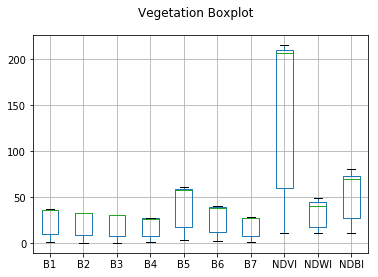

In [3]:
def crop_calc(_class, bands):
    mean = []
    median = []
    std = []
    p25 = []
    p75 = []
    diff = []
    
    _bnd = []
    x = y = w = h = 0
    if(_class == 1): # Vegetation
        x = 178
        y = 72
        w = 40
        h = 40
    elif(_class == 2): # Built-up
        x = 12
        y = 11
        w = 80
        h = 80
    elif(_class == 3) : # Water
        x = 118
        y = 156
        w = 20
        h = 40
    
    for i, img in enumerate(bands):
#         val = []
        crop_img = img[y:y+h, x:x+w]
        cv2.imwrite('output/cropped/' + str(_class) + '_' +str(i+1) + '.tif', crop_img)
        
        mean.append(np.mean(crop_img))
        median.append(np.median(crop_img))
        std.append(np.std(crop_img))
        
        q1_x = np.percentile(crop_img, 25, interpolation='midpoint')
        q3_x = np.percentile(crop_img, 75, interpolation='midpoint')
        dif = q3_x - q1_x
        
        p25.append(q1_x)
        p75.append(q3_x)
        diff.append(dif)
        
        
#         print(i+1)
    
    _bnd.append(mean)
    _bnd.append(median)
    _bnd.append(std)
    _bnd.append(p25)
    _bnd.append(p75)
    _bnd.append(diff)
    return _bnd
        

veg = crop_calc(1, data)
# print('length:', len(values))

# df = pd.DataFrame(values, columns=['mean', 'median', 'std', 'p25', 'p75', 'diff'])
# boxplot = df.boxplot(column=['mean', 'median', 'std', 'p25', 'p75', 'diff'])


df = pd.DataFrame(veg, columns=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])
boxplot = df.boxplot(column=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])

fig = boxplot.get_figure()
fig.suptitle('Vegetation Boxplot')
fig.savefig('output/vegetation-boxplot.png')

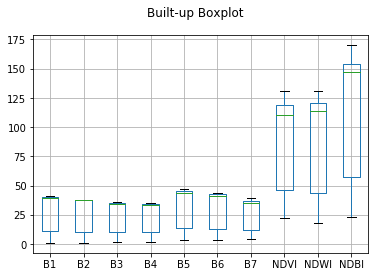

In [4]:
built = crop_calc(2, data)

# df = pd.DataFrame(values, columns=['mean', 'median', 'std', 'p25', 'p75', 'diff'])
# boxplot = df.boxplot(column=['mean', 'median', 'std', 'p25', 'p75', 'diff'])


df = pd.DataFrame(built, columns=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])
boxplot = df.boxplot(column=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])

fig = boxplot.get_figure()
fig.suptitle('Built-up Boxplot')
fig.savefig('output/built-up-boxplot.png')

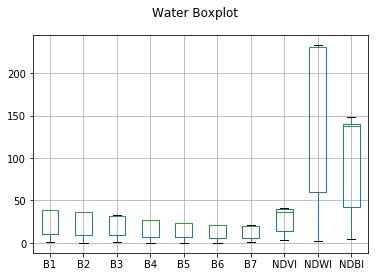

In [5]:
water = crop_calc(3, data)

# df = pd.DataFrame(values, columns=['mean', 'median', 'std', 'p25', 'p75', 'diff'])
# boxplot = df.boxplot(column=['mean', 'median', 'std', 'p25', 'p75', 'diff'])


df = pd.DataFrame(water, columns=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])
boxplot = df.boxplot(column=['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'NDVI', 'NDWI', 'NDBI'])

fig = boxplot.get_figure()
fig.suptitle('Water Boxplot')
fig.savefig('output/water-boxplot.png')

### Boxplot by Band and Index Images

In [6]:
def box_plot(j, title):
    veg_b1 = []
    for i in veg:
        veg_b1.append(i[j])

    built_b1 = []
    for i in built:
        built_b1.append(i[j])

    water_b1 = []
    for i in water:
        water_b1.append(i[j])

    b1 = []
    b1.append(veg_b1)
    b1.append(built_b1)
    b1.append(water_b1)


    #     print(b1)

    result = [[b1[j][i] for j in range(len(b1))] for i in range(len(b1[0]))]
    #     print(result)

    df = pd.DataFrame(result, columns=['Veg', 'Built', 'Water'])
    boxplot = df.boxplot(column=['Veg', 'Built', 'Water'])

    fig = boxplot.get_figure()
    fig.suptitle(title)
    
    

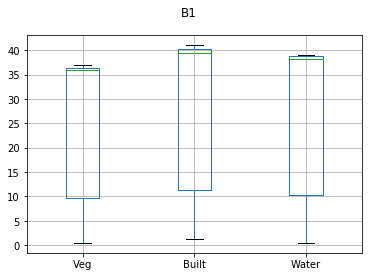

In [7]:
box_plot(0, "B1")

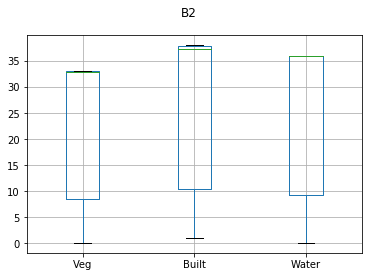

In [8]:
box_plot(1, "B2")

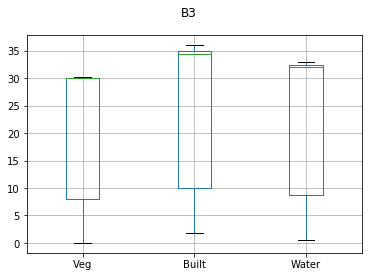

In [9]:
box_plot(2, "B3")

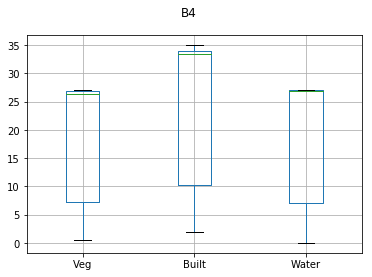

In [10]:
box_plot(3, "B4")

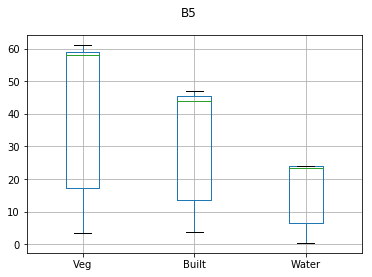

In [11]:
box_plot(4, "B5")

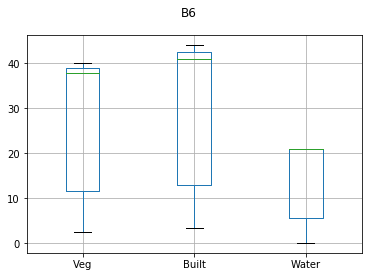

In [12]:
box_plot(5, "B6")

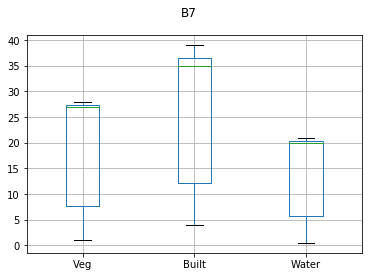

In [13]:
box_plot(6, "B7")

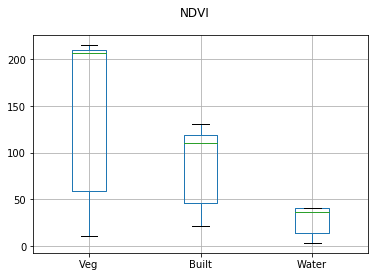

In [14]:
box_plot(7, "NDVI")

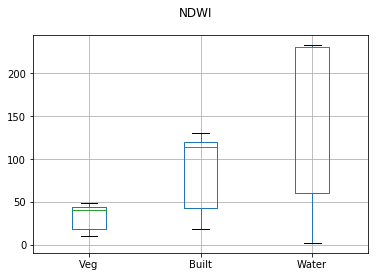

In [15]:
box_plot(8, "NDWI")

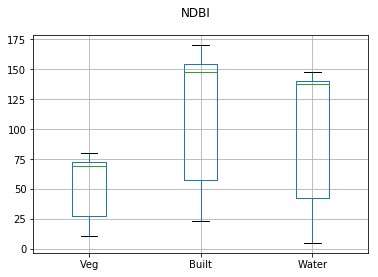

In [16]:
box_plot(9, "NDBI")